## 세계 CPU and GPU성능에 따른 대한민국 반도체 및 디스플레이 동향파악

#### 최종분석목표

1. 대한민국 반도체, 디스플레이 시장이 CPU와 GPU의 연관성
2. DRAM은 CPU, GPU의 연관성
3. 반도체 시장은 CPU, GPU의 연관성
4. 디스플레이 시장은 CPU, GPU의 연관성
5. (CPU는 반도체 시장과 연관이 있고, GPU는 디스플레이 시장과 연관이 있을꺼라는 추측)

           


> CPU와 GPU가 무어의 법칙을 따르는가 - 무어의 법칙을 설명해야함

> 시점 구간별 정리 제품 출시업체(CPU = intel, amd, GPU = NVIDIA, intel)

> CPU와 GPU의 년간 Freq와 TDP의 상관도가 있는가

- GPU 성능 향상은 더 작은 트랜지스터, 더 큰 다이 크기 및 더 높은 주파수의 공동 효과
- 주파수에 따른 CPU와 GPU차이
- 각 회사 별 GPU 주파수, 트랜지스터 차이
- 아무래도 년도가 같을 수록 서로 잘 맞을 것이다. cpu나 gpu를 알려주는
- 트랜지스터나 주파수를 치면 대충 어느정도의 성능이 나올 것인지 (회사입장)

위의 파일들에서 타겟값 설정

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from time import sleep

In [23]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [10]:
# year만 빼내서 저장
def check_Date(df):

    return df[:4]


# 문자 $ 제거
def check_str(df1):
    if '$' in df1:
        return df1[1:]
    else:
        return df1
    
    
# 쉼표 제거    
def check_star(df2):
    if ',' in df2:
        return df2[:1] + df2[2:]
    else:
        return df2

In [11]:
# Model로 스마트폰 출시년도를 가져오기 위해 selenium
def do_year(search_keyword):
    #driver = webdriver.Chrome()
    window_chrome = driver.current_window_handle
    driver.get('https://www.gsmarena.com/')
    # 검색창 가져오기
    search_box = driver.find_elements(By.XPATH, '//input[@type="text"]')
    # 검색
    search_box[0].send_keys(search_keyword)
    sleep(3)
    search_box[0].click()
    # 창이 뜰때까지 잠시 대기
    sleep(3)
    # 창이 뜨면 처음꺼 검색
    search_box[0].send_keys(Keys.ARROW_DOWN + Keys.ENTER)
    # 년도 데이터 가져오기
    year_xpath = '//div[@id="specs-list"]//td[@data-spec="year"]'
    year = driver.find_elements(By.XPATH, year_xpath)
    return year 


#first_list[0].click()
#for i in pd_phone['Model']:
#    search_box[0].send_keys('i')

In [5]:
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")

driver = webdriver.Chrome(options = options)
list2 = []
for e in pd_phone['Model']:
    data = do_year(e)
    if data == []:
        list2.append('NaN')
        print(list2)
    else:    
        for i in data:
            years = i.text.split(',')[0]
            list2.append(years)
            # 잘 가져오나 확인 필요
            print(list2)
            
driver.quit()

NameError: name 'pd_phone' is not defined

In [12]:
file = 'chip_dataset.csv'
pd_chip = pd.read_csv(file, encoding = 'UTF-8')
cp_chip = pd_chip
cp_chip.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [13]:
# 필요없는 부분 drop
cp_chip.drop(['Unnamed: 0','TDP (W)', 'Die Size (mm^2)', 'Product', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'], axis = 1, inplace = True)

In [14]:
# 년도만
cp_chip['년도'] = cp_chip['Release Date'].apply(check_Date)

In [15]:
# 원래 Release Date 삭제
cp_chip.drop(['Release Date'], axis = 1, inplace = True)

In [16]:
# NaN값 대체, 소수점 다 버림
Tran_mean = round(cp_chip['Transistors (million)'].mean(), 0)
Freq_mean = round(cp_chip['Freq (MHz)'].mean(), 0)
Process_mean = round(cp_chip['Process Size (nm)'].mean(), 0)


cp_chip['Transistors (million)'] = cp_chip['Transistors (million)'].fillna(Tran_mean)
cp_chip['Freq (MHz)'] = cp_chip['Freq (MHz)'].fillna(Freq_mean)
cp_chip['Process Size (nm)'] = cp_chip['Process Size (nm)'].fillna(Process_mean)
cp_chip

,Type,Process Size (nm),Transistors (million),Freq (MHz),Foundry,Vendor,년도
0,CPU,65.0,122.0,2200.0,Unknown,AMD,2007
1,CPU,14.0,4800.0,3200.0,Unknown,AMD,2018
2,CPU,10.0,1930.0,2600.0,Intel,Intel,2020
3,CPU,22.0,1400.0,1800.0,Intel,Intel,2013
4,CPU,45.0,758.0,3700.0,Unknown,AMD,2011
...,...,...,...,...,...,...,...
4849,GPU,40.0,1950.0,450.0,TSMC,NVIDIA,2011
4850,GPU,90.0,1930.0,250.0,Intel,Intel,2005
4851,GPU,40.0,486.0,500.0,TSMC,NVIDIA,2010
4852,GPU,150.0,29.0,250.0,TSMC,NVIDIA,2003


In [17]:
# 각연도 별 groupby mean값 (연도와 type으로) 없는 index는 drop
g1 = cp_chip.groupby(['년도', 'Type'])
g2 = g1.mean()
g3 = g2.drop([('2000', 'CPU'),
            ('2000', 'GPU'),
            ('2001', 'CPU'),
            ('2001', 'GPU'),
            ('2002', 'CPU'),
            ('2002', 'GPU'),
            ('2003', 'CPU'),
            ('2003', 'GPU')], axis = 0)
g4 = g3.unstack()
g4.columns = ['Process Size(nm)_CPU', 'Process Size(nm)_GPU', 'Transistors (million)_CPU',
              'Transistors (million)_GPU', 'Freq (MHz)_CPU', 'Freq (MHz)_GPU']
g4
g5 = g4.drop('NaT', axis = 0)
g5

/tmp/ipykernel_5396/2841394540.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g2 = g1.mean()


,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,
2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243


In [18]:
data = '산업통상자원부_반도체디스플레이 산업 동향_20211231.csv'
pd_con = pd.read_csv(data, encoding = 'cp949')
pd_con = pd_con.set_index('연도')
pd_con

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수출증가율(퍼센트),반도체_수입(억불),반도체_수입증가율(퍼센트),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수출증가율(퍼센트),디스플레이_수입(억불),디스플레이_수입증가율(퍼센트),LCD_평균가격(달러)
연도,,,,,,,,,,,,,,
2004,34.6,9.6,265.2,35.7,236.2,10.7,1.72,33.0,38.7,14,75.0,10,42.9,28.9
2005,32.4,10.5,299.8,13.1,251.3,6.4,2.16,36.0,40.7,49,250.0,10,0.0,28.0
2006,32.4,11.3,373.6,24.6,280.4,11.6,1.59,40.6,40.6,125,155.1,12,20.0,25.8
2007,37.5,11.4,390.4,4.5,308.2,9.9,2.17,43.6,40.4,171,36.8,30,150.0,23.8
2008,36.4,9.8,327.9,-16.0,320.2,3.9,0.93,51.9,39.5,188,9.9,39,30.0,30.1
2009,40.8,11.7,310.4,-5.3,266.2,-16.9,0.66,72.6,45.3,256,36.2,42,7.7,28.6
2010,51.2,14.3,507.1,63.4,311.4,17.0,1.20,90.0,45.7,332,29.7,52,23.8,31.9
2011,61.5,13.8,501.4,-1.1,324.8,4.3,0.60,86.7,47.6,333,0.3,51,-1.9,30.1
2012,64.5,14.3,504.3,0.6,322.4,-0.8,1.60,82.3,50.7,368,10.5,45,-11.8,34.7


In [19]:
pd_con.index = g5.index
pd_korea = pd.concat((pd_con, g5), axis = 1)
pd_korea

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수출증가율(퍼센트),반도체_수입(억불),반도체_수입증가율(퍼센트),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수출증가율(퍼센트),디스플레이_수입(억불),디스플레이_수입증가율(퍼센트),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,,,,,
2004,34.6,9.6,265.2,35.7,236.2,10.7,1.72,33.0,38.7,14,75.0,10,42.9,28.9,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
2005,32.4,10.5,299.8,13.1,251.3,6.4,2.16,36.0,40.7,49,250.0,10,0.0,28.0,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2006,32.4,11.3,373.6,24.6,280.4,11.6,1.59,40.6,40.6,125,155.1,12,20.0,25.8,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
2007,37.5,11.4,390.4,4.5,308.2,9.9,2.17,43.6,40.4,171,36.8,30,150.0,23.8,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
2008,36.4,9.8,327.9,-16.0,320.2,3.9,0.93,51.9,39.5,188,9.9,39,30.0,30.1,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
2009,40.8,11.7,310.4,-5.3,266.2,-16.9,0.66,72.6,45.3,256,36.2,42,7.7,28.6,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
2010,51.2,14.3,507.1,63.4,311.4,17.0,1.20,90.0,45.7,332,29.7,52,23.8,31.9,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
2011,61.5,13.8,501.4,-1.1,324.8,4.3,0.60,86.7,47.6,333,0.3,51,-1.9,30.1,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
2012,64.5,14.3,504.3,0.6,322.4,-0.8,1.60,82.3,50.7,368,10.5,45,-11.8,34.7,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243


In [20]:
# 2020, 2021 반도체 생산 조원 회귀선 예측
pd_korea_cp = pd_korea
pd_korea_cp = pd_korea_cp.reset_index()
pd_korea_cp

a = pd_korea_cp['년도']
xs = a.iloc[:-2].astype(np.int64)
b = pd_korea_cp['반도체_생산(조원)']
ys = b.iloc[:-2]

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()

print('mean(xs, ys) : ', xs_mean,'\t', ys_mean)
print('std(xs, ys) : ', xs_std, '\t', ys_std)
xy_corr = np.corrcoef(xs, ys)[0,1]
print('corrcoef : ', xy_corr)

# 기울기
slope = xy_corr * (ys_std / xs_std)
# y값
intercept = ys_mean - (slope * xs_mean)
print('intercept : ', intercept)

ys_pred = xs*slope+intercept

sse = np.sum((ys - ys_pred)**2)
print('sse : ', sse)

mean(xs, ys) :  2011.5 	 68.39375
std(xs, ys) :  4.760952285695233 	 36.357932994969154
corrcoef :  0.9320133214978046
intercept :  -14248.4575
sse :  2604.495249999917


In [21]:
# 2020, 2021 디스플레이 생산 조원 회귀선 예측

c = pd_korea_cp['년도']
xv = c.iloc[:-2].astype(np.int64)
d = pd_korea_cp['디스플레이_생산(조원)']
yv = d.iloc[:-2]

xv_mean = xv.mean()
yv_mean = yv.mean()
xv_std = xv.std()
yv_std = yv.std()

print('mean(xv, yv) : ', xv_mean,'\t', yv_mean)
print('std(xv, yv) : ', xv_std, '\t', yv_std)
xy_dis_corr = np.corrcoef(xv, yv)[0,1]
print('corrcoef : ', xy_dis_corr)

# 기울기
slop = xy_dis_corr * (yv_std / xv_std)
# y값
inter = yv_mean - (slop * xv_mean)
print('intercept : ', inter)

yv_pred = xv*slop+inter

sse_1 = np.sum((yv - yv_pred)**2)
print('sse : ', sse_1)

mean(xv, yv) :  2011.5 	 64.85
std(xv, yv) :  4.760952285695233 	 18.403550382104715
corrcoef :  0.6223957252556586
intercept :  -4774.582352941174
sse :  3112.3482352940946


2020 반도체 예측값 :  128.8924999999981
2021 반도체 예측값 :  136.0099999999984
2020 디스플레이 예측값 :  85.30000000000109
2021 디스플레이 예측값 :  87.70588235294235


Text(0.5, 1.0, '디스플레이 생산(조원) 2020,2021년도 예측')

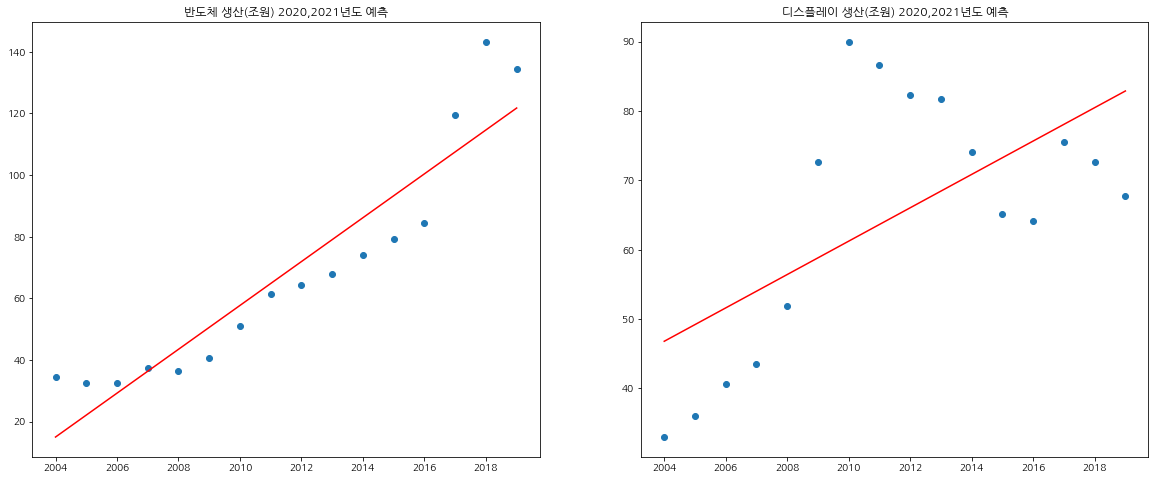

In [24]:
# 2020년 반도체_생산(조원) 예측 
ys_predict = 2020*slope+intercept
print('2020 반도체 예측값 : ', ys_predict)
ys_predict_1 = 2021*slope+intercept
print('2021 반도체 예측값 : ', ys_predict_1)

fig, axe = plt.subplots(1,2, figsize = (20,8))
axe[0].scatter(xs, ys)
axe[0].plot(xs, ys_pred, c = 'r')
axe[0].set_title('반도체 생산(조원) 2020,2021년도 예측')

# 2020년 반도체_생산(조원) 예측 
ys_predict_dis = 2020*slop+inter
print('2020 디스플레이 예측값 : ', ys_predict_dis)
ys_predict_1_dis = 2021*slop+inter
print('2021 디스플레이 예측값 : ', ys_predict_1_dis)


axe[1].scatter(xv, yv)
axe[1].plot(xv, yv_pred, c = 'r')
axe[1].set_title('디스플레이 생산(조원) 2020,2021년도 예측')

In [14]:
# 반도체 NaN값 대체
pd_korea.iloc[-2, 0] = ys_predict
pd_korea.iloc[-1, 0] = ys_predict_1

# 디스플레이 NaN값 대체
pd_korea.iloc[-2, 7] = ys_predict_dis
pd_korea.iloc[-1, 7] = ys_predict_1_dis

pd_korea = round(pd_korea, 2)
pd_korea

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수출증가율(퍼센트),반도체_수입(억불),반도체_수입증가율(퍼센트),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수출증가율(퍼센트),디스플레이_수입(억불),디스플레이_수입증가율(퍼센트),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,,,,,
2004,34.60,9.6,265.2,35.7,236.2,10.7,1.72,33.00,38.7,14,75.0,10,42.9,28.9,109.71,121.38,104.21,332.94,2267.71,367.38
2005,32.40,10.5,299.8,13.1,251.3,6.4,2.16,36.00,40.7,49,250.0,10,0.0,28.0,92.95,112.32,230.58,294.68,2409.83,405.27
2006,32.40,11.3,373.6,24.6,280.4,11.6,1.59,40.60,40.6,125,155.1,12,20.0,25.8,75.93,93.18,478.27,348.03,2370.70,460.47
2007,37.50,11.4,390.4,4.5,308.2,9.9,2.17,43.60,40.4,171,36.8,30,150.0,23.8,70.87,80.03,398.01,388.80,2180.65,524.36
2008,36.40,9.8,327.9,-16.0,320.2,3.9,0.93,51.90,39.5,188,9.9,39,30.0,30.1,58.57,63.44,606.09,566.83,2287.24,564.19
2009,40.80,11.7,310.4,-5.3,266.2,-16.9,0.66,72.60,45.3,256,36.2,42,7.7,28.6,45.91,52.78,533.86,613.83,2519.90,584.58
2010,51.20,14.3,507.1,63.4,311.4,17.0,1.20,90.00,45.7,332,29.7,52,23.8,31.9,40.58,42.87,539.96,972.98,2477.24,613.74
2011,61.50,13.8,501.4,-1.1,324.8,4.3,0.60,86.70,47.6,333,0.3,51,-1.9,30.1,33.47,39.28,976.62,1228.20,2355.50,641.36
2012,64.50,14.3,504.3,0.6,322.4,-0.8,1.60,82.30,50.7,368,10.5,45,-11.8,34.7,27.46,33.65,1602.25,1685.98,2604.47,696.05


In [15]:
dat = 'Mobile phone price.csv'
pd_phone = pd.read_csv(dat, encoding = 'cp949')
pd_phone

,癤풟rand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [16]:
list1 = ['2021', '2021', '2020', '2021', '2022', '2021', '2021', '2021', '2021', '2021', '2022', '2021', '2021', '2020', '2021', 'NaN', '2022', '2021', '2021', '2021', '2021', '2021', 'NaN', '2018', '2021', '2019', '2021', '2021', 'NaN', '2022', '2021', '2021', '2020', '2021', '2021', '2021', '2021', '2022', '2021', '2018', '2021', '2021', '2021', '2021', '2021', '2020', '2021', '2022', '2021', '2021', '2020', '2019', '2021', '2021', '2021', '2023', '2021', 'NaN', '2021', '2021', '2021', '2021', '2020', '2021', '2020', '2021', '2021', '2021', '2018', '2021', '2021', '2021', '2021', '2021', '2019', '2021', '2021', '2021', '2022', '2022', '2022', '2022', 'NaN', '2021', '2021', '2021', '2021', '2021', '2020', '2021', '2018', '2021', '2021', 'NaN', '2021', '2021', '2021', '2020', '2020', '2021', '2018', '2020', '2021', '2020', '2021', '2021', '2021', '2021', '2020', '2021', '2021', '2021', '2021', '2020', '2018', 'NaN', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2023', '2021', '2021', '2021', '2022', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2020', '2020', '2021', '2021', '2021', '2021', '2021', 'NaN', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', 'NaN', '2021', '2020', '2021', '2021', '2021', '2021', '2021', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', 'NaN', '2021', 'NaN', '2020', '2021', '2021', '2021', '2021', '2021', 'NaN', '2022', '2021', '2020', '2021', '2020', '2021', 'NaN', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', 'NaN', '2021', '2021', '2021', '2021', 'NaN', '2021', '2021', '2020', '2021', '2022', '2020', '2021', '2022', '2020', '2021', '2020', '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2020', '2021', '2021', '2021', '2021', '2021', '2021', 'NaN', '2021', '2022', '2021', '2021', '2021', '2021', '2021', '2021', '2020', '2021', '2020', '2023', '2020', '2020', '2020', '2020', '2023', '2020', '2021', '2021', '2020', '2020', '2020', '2021', '2020', '2020', '2019', '2020', '2023', '2020', '2020', '2020', '2020', '2020', '2020', '2021', 'NaN', '2018', '2019', '2020', '2020', '2019', '2020', '2021', '2019', '2020', '2020', '2021', '2020', '2020', '2020', '2021', '2019', '2020', '2019', '2021', '2021', '2020', '2020', '2021', '2023', '2020', '2021', '2020', '2021', '2018', '2021', '2021', 'NaN', '2020', '2020', '2021', '2020', '2020', '2020', '2020', '2021', '2021', 'NaN', '2020', '2019', '2019', '2020', '2019', '2021', '2021', '2019', '2019', '2021', '2020', '2020', '2020', '2020', '2020', '2020', '2018', '2021', '2020', '2020', '2019', '2020', '2022', '2019', '2020', '2017', '2022', '2020', '2020', '2021', '2021', '2020', '2023', '2018', '2020', '2021', '2021', '2021', '2021', '2020', '2019', '2020', '2020', '2020', 'NaN', '2020', '2020', '2020', '2020', '2018', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021', '2020', '2020', '2020', '2020', '2021', '2022', '2019', '2021', '2020', '2020', '2020', '2023', '2020', 'Expected announcement 2023', '2018', '2020', '2021', '2020', '2020', '2019', '2020', '2020', '2020', '2020', '2020']
pd_phoneyear = pd.DataFrame(list1)
pd_phoneyear.columns = ['년도']
pd_phoneyear.iloc[-12: -1] = '2021'
pd_price = pd.concat((pd_phone, pd_phoneyear), axis=1)
filter1 = pd_price['년도'] == 'NaN'
pd_price['년도'][filter1]
pd_price.drop([15,22,28,57,82,93,115,147,161,182,184,191,198,207,212,242,279,311,321,366], axis=0, inplace = True, )
pd_price

,癤풟rand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),년도
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999,2021
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199,2021
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899,2020
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279,2021
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799,2022
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,2021
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,2021
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,2021
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,2021


In [17]:
# index 초기화
pd_price = pd_price.reset_index()

In [18]:
pd_price.drop(['index'], axis=1, inplace = True)

In [19]:
pd_price

,癤풟rand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),년도
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999,2021
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199,2021
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899,2020
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279,2021
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799,2022
...,...,...,...,...,...,...,...,...,...
382,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,2021
383,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,2021
384,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099,2021
385,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429,2021


In [20]:
pd_price.to_csv('myphone_price_finally.csv')

In [21]:
phone_f = 'myphone_price_finally.csv'
pd_phoneprice = pd.read_csv(phone_f, encoding = 'UTF-8')
pd_phoneprice
pd_phoneprice.columns = ['index', 'company', 'Model', 'Storage' , 'RAM', 'Screen Size(inches)', 'Camera(MP)', 'Battery Capacity(mAh)', 'Price($)', '년도']

In [22]:
# int64로 하기 위해 정수값 맞추기

# 시행착오 : replace하면 그대로 유지...
#pd_phoneprice['Price($)'] = pd_phoneprice['Price($)'].replace('$', '')
#pd_phoneprice['Price($)'] = pd_phoneprice['Price($)'].replace(',', '')

pd_phoneprice['Price($)'] = pd_phoneprice['Price($)'].apply(check_str)
pd_phoneprice['Price($)'] = pd_phoneprice['Price($)'].apply(check_star)
pd_phoneprice['Price($)'] = pd_phoneprice['Price($)'].astype(np.int64)
pd_phoneprice['Price($)']

0       999
1      1199
2       899
3       279
4       799
       ... 
382    1049
383     349
384    1099
385     429
386     649
Name: Price($), Length: 387, dtype: int64

In [23]:
# 필요없는 col 제거
pd_smartphone = pd_phoneprice.drop(['index', 'Model', 'Storage', 'RAM', 'Screen Size(inches)', 'Camera(MP)'], axis=1)

In [24]:
# 최종 확인
pd_smartphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                387 non-null    object
 1   Battery Capacity(mAh)  387 non-null    int64 
 2   Price($)               387 non-null    int64 
 3   년도                     387 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.2+ KB


In [30]:
# 나중에 추가로 진행할 데이터 프레임 phoneprice_fin
g_smartphone = pd_smartphone.groupby(['년도', 'company'])
phoneprice_fin = g_smartphone.mean()
phoneprice_fin


# 여기까지 데이터 전처리

Battery Capacity(mAh)     Price($)
년도   company                                       
2017 Apple                 2691.000000   699.000000
2018 Apple                 2988.400000   639.000000
     Blackberry            3500.000000   499.000000
     Nokia                 3500.000000   139.000000
     OnePlus               4500.000000   729.000000
2019 Apple                 3478.142857   849.000000
     Huawei                4350.000000  1049.000000
     Nokia                 3500.000000   299.000000
     OnePlus               4510.000000   999.000000
     Samsung               4333.333333   425.666667
     Vivo                  5000.000000   189.000000
     Xiaomi                4000.000000   169.000000
2020 Apple                 2141.600000   614.000000
     CAT                   4200.000000   299.000000
     Google                3785.000000   679.000000
     Huawei                4175.000000   784.000000
     LG                    4100.000000   615.666667
     Motorola              5250.000000   234.000000
     Nokia                 4181.818182   243.545455
     OnePlus               4420.000000   687.000000
     Oppo                  4264.444444   330.111111
     Realme                5166.666667   190.666667
     Samsung               5030.769231   544.807692
     Vivo                  4820.000000   203.000000
     Xiaomi                5262.666667   253.666667
2021 Apple                 3028.166667   849.000000
     Asus                  5000.000000   874.000000
     Huawei                3340.000000   329.000000
     Motorola              4911.764706   297.823529
     Nokia                 4798.333333   261.500000
     Oppo                  4666.617647   374.000000
     Realme                5214.285714   190.785714
     Samsung               4982.222222   438.777778
     Sony                  4500.000000  1299.000000
     Vivo                  4719.642857   355.785714
     Xiaomi                5132.340426   294.106383
2022 Google                4607.000000   749.000000
     Nokia                 6000.000000   149.000000
     OnePlus               4375.000000   456.500000
     Oppo                  5000.000000   234.000000
     Realme                5333.333333   229.000000
     Samsung               4250.000000   646.500000
     Xiaomi                5160.000000   329.000000
2023 OnePlus               4371.666667   649.000000
     Oppo                  5000.000000   235.000000

# 전처리 정리

#### 1. g5는 CPU와 GPU의 Process Size(nm), Transistors (million), Freq(MHz)를 연도(2004 ~ 2021) 별로 정리
    - 결측값은 각 값의 평균값(mean)으로 대체 하고 Groupby 진행
    - 불필요한 부분 함수로 정리
    
#### 2. pd_korea는 한국의 반도체 및 디스플레이 그리고 DRAM의 정보들을 연도(2004 ~ 2021)별로 정리
    - 결측값은 회귀선 분석으로 예측하여 대체
    - 불필요한 부분 함수로 정리
    
#### 3. phoneprice_fin은 2017 ~ 2023년도 휴대폰 가격정보와 배터리 정보 평균값 정리
    - selenium으로 각 휴대폰 모델을 반복 검색하여 출시년도를 가져옴
    - 불필요한 부분 함수로 정리

In [32]:
# 데이터프레임 3개를 하나의 리스트에 저장 ==> pickle파일로 저장
list_fin = [g5, pd_korea, phoneprice_fin]
list_fin

[      Process Size(nm)_CPU  Process Size(nm)_GPU  Transistors (million)_CPU  \
 년도                                                                            
 2004            109.705882            121.384615                 104.213235   
 2005             92.954545            112.315789                 230.584416   
 2006             75.925926             93.178295                 478.266667   
 2007             70.869565             80.031646                 398.014493   
 2008             58.571429             63.439306                 606.089286   
 2009             45.913043             52.783019                 533.860870   
 2010             40.576389             42.870748                 539.958333   
 2011             33.465409             39.280702                 976.616352   
 2012             27.455696             33.653179                1602.253165   
 2013             25.007143             28.971292                1577.800000   
 2014             22.098361             

In [33]:
# 전처리 한 파일 저장
import pickle

with open('mydataframe.pickle', 'wb') as f:
    pickle.dump(list_fin, f)